### Import all modules and classes from other files

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px 
import seaborn as sns
from datetime import datetime 
from db_datatransform import DataTransform
from db_info import DataFrameInfo
from db_info import read_csv
from db_clean_data import Plotter
from db_clean_data import DataFrameTransform
from db_datatransform import DataTransform
from db_info import DataFrameInfo
from scipy import stats

In [3]:
filename = 'loan_payments.csv'
loan_payments_df = read_csv(filename)  # calls the read_csv funciton to load data 
loan_payments_df = loan_payments_df.drop(columns=loan_payments_df.columns[0], axis=1) # remove additional index column
column_names = loan_payments_df.columns.tolist() # creates a list of the column headings as strings 
data_transform_instance = DataTransform(loan_payments_df) # creates an instance of the DataTransform class

In [4]:
col_to_convert_to_datetime = ['issue_date', 
                                 'earliest_credit_line', 
                                 'last_payment_date',
                                 'next_payment_date', 
                                 'last_credit_pull_date'] # list of strings specifying columns to be converted
col_to_convert_to_float = ['term','employment_length'] # list of strings of column names
col_to_convert_to_str = ['grade', 'sub_grade'] # list of strings of column names
col_to_convert_to_categorical = ['home_ownership',
                                    'verification_status', 
                                    'loan_status', 
                                    'payment_plan', 
                                    'purpose', 
                                    'application_type']  # list of strings of column names

In [5]:
for i in range(0,len(col_to_convert_to_datetime)): # loops over list of column names
       datetime_format = '%b-%Y'
       data_transform_instance.obj_to_datetime(col_to_convert_to_datetime[i],datetime_format) # calls the obj_to_datetime method to convert data to datetime

In [6]:
for i in range(0,len(col_to_convert_to_float)): # loops over list of column names
       data_transform_instance.obj_to_int(col_to_convert_to_float[i]) # calls the obj_to_int method to convert data to int

In [7]:
for i in range(0,len(col_to_convert_to_str)): # loops over list of column names
       data_transform_instance.obj_to_str(col_to_convert_to_str[i]) # calls the obj_to_string method to convert data to str

In [8]:
for i in range(0,len(col_to_convert_to_categorical)): #loops over list of column names
       data_transform_instance.obj_to_cat(col_to_convert_to_categorical[i]) # calls the obj_to_ method to convert data to categorical

In [9]:
nulls_info_instance = DataFrameInfo(loan_payments_df) # initialises an instnce of the class to obtain information on the dataframe
null_columns = [] # initialise list of null columns
for i in range (0, len(column_names)):
    null_pc = nulls_info_instance.null_percentage(column_names[i])
    if null_pc > 0.0:
        null_columns.append(column_names[i]) # append to list of columns if there are any null values 

id 0.0
member_id 0.0
loan_amount 0.0
funded_amount 5.544799100145673
funded_amount_inv 0.0
term 8.799395179878667
int_rate 9.53144880234552
instalment 0.0
grade 0.0
sub_grade 0.0
employment_length 3.905515295679593
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_date 0.0
loan_status 0.0
payment_plan 0.0
purpose 0.0
dti 0.0
delinq_2yrs 0.0
earliest_credit_line 0.0
inq_last_6mths 0.0
mths_since_last_delinq 57.16656524865852
mths_since_last_record 88.60245984768859
open_accounts 0.0
total_accounts 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_payment 0.0
total_payment_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_payment_date 0.13460935627224282
last_payment_amount 0.0
next_payment_date 60.12797108664786
last_credit_pull_date 0.012907746491858899
collections_12_mths_ex_med 0.09404215301211484
mths_since_last_major_derog 86.17211557965001
policy_code 0.0
application_type 0.0


In [10]:
for i in range (0, len(column_names)):
    null_pc = nulls_info_instance.null_percentage(column_names[i])
    print(column_names[i], null_pc)
print(null_columns)

id 0.0
member_id 0.0
loan_amount 0.0
funded_amount 0.0
funded_amount_inv 0.0
term 0.0
int_rate 0.0
instalment 0.0
grade 0.0
sub_grade 0.0
employment_length 0.0
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_date 0.0
loan_status 0.0
payment_plan 0.0
purpose 0.0
dti 0.0
delinq_2yrs 0.0
earliest_credit_line 0.0
inq_last_6mths 0.0
mths_since_last_delinq 0.0
mths_since_last_record 0.0
open_accounts 0.0
total_accounts 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_payment 0.0
total_payment_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_payment_date 0.0
last_payment_amount 0.0
next_payment_date 0.0
last_credit_pull_date 0.0
collections_12_mths_ex_med 0.0
mths_since_last_major_derog 0.0
policy_code 0.0
application_type 0.0
['funded_amount', 'term', 'int_rate', 'employment_length', 'mths_since_last_delinq', 'mths_since_last_record', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date', 'collections_12

In [11]:
columns_to_drop = ['mths_since_last_delinq', 
                      'mths_since_last_record', 
                      'next_payment_date', 
                      'mths_since_last_major_derog'] # list of strings of columns with > 50% null values
columns_to_impute = ['funded_amount','term','int_rate','employment_length'] # list of strings of columns with a small amount of null values 
columns_to_drop_null_value_rows = ['last_payment_date', 
                                      'last_credit_pull_date', 
                                      'collections_12_mths_ex_med'] # list of strings of columns with < 1% null values 

In [12]:
loan_payments_df_copy = loan_payments_df.copy() #create copy of df before removing any values for data preservation
remove_null_instance = DataFrameTransform(loan_payments_df_copy) # initialises an instance of the DataFrameTransform class for dealing with null values
df_info_instance = DataFrameInfo(loan_payments_df_copy) # initialises an instnce of the class to get info on the df 

In [13]:
for i in range(0, len(columns_to_drop)):
      loan_payments_df_copy = remove_null_instance.drop_column(columns_to_drop[i]) # drops columns with > 50 % null values
for i in range(0, len(columns_to_drop_null_value_rows)):
      loan_payments_df_copy = remove_null_instance.drop_null_rows(columns_to_drop_null_value_rows[i]) # drops rows with null values in specific columns

In [14]:
for i in range(0, len(columns_to_impute)):
      mean = df_info_instance.get_mean(columns_to_impute[i])
      print('MEAN', columns_to_impute[i], mean)

MEAN funded_amount 13229.50911682024
MEAN term 42.60619907398047
MEAN int_rate 13.507328482328484
MEAN employment_length 5.7873467273041275


In [15]:
for i in range(0, len(columns_to_impute)):
      stdv = df_info_instance.get_stdev(columns_to_impute[i])
      print('STDEV', columns_to_impute[i], stdv)

STDEV funded_amount 8019.017599340406
STDEV term 10.71957251449535
STDEV int_rate 4.392892583652243
STDEV employment_length 3.5080650106320297


In [ ]:
for i in range(0, len(columns_to_impute)):
       mode = df_info_instance.get_mode(columns_to_impute[i])
       print('MODE', columns_to_impute[i], mode)

In [ ]:
for i in range(0, len(columns_to_impute)):
       median = df_info_instance.get_median(columns_to_impute[i])
       print('MEDIAN', columns_to_impute[i], median)

In [ ]:
for i in range(0, len(columns_to_impute)):
       ranges = df_info_instance.get_range(columns_to_impute[i])
       print('RANGE',columns_to_impute[i], ranges)

In [ ]:
for i in range(0, len(columns_to_impute)):
       df_info_instance.get_normal_dist(columns_to_impute[i])

In [16]:
loan_payments_df_copy = remove_null_instance.impute_na_with_mode('term') # impute null values with mode, as this is categorical data
loan_payments_df_copy = remove_null_instance.impute_na_with_median('employment_length') # impute null value with median, to keep all values as whole numbers 
loan_payments_df_copy = remove_null_instance.impute_na_with_mean('funded_amount') # impute null values with mean as data is continuous with a normal distribution 
loan_payments_df_copy = remove_null_instance.impute_na_with_mean('int_rate') # impute null values with mean as data is continuous with a normal distribution

In [17]:
column_names_copy = loan_payments_df_copy.columns.tolist() # creates a list of the remaining column headings as strings 
null_columns_copy = []
for i in range (0, len(column_names_copy)): # to check that the correct columns and rows have been dropped and view null percentages to confirm 
    null_pc = df_info_instance.null_percentage(column_names_copy[i])
    print(column_names_copy[i], null_pc)
    if null_pc > 0.0:
      null_columns_copy.append(column_names_copy[i]) # append columns with null values to list 
print(null_columns_copy) # check print to ensure correct columns and rows have been dropped 

id 0.0
member_id 0.0
loan_amount 0.0
funded_amount 5.544799100145673
funded_amount_inv 0.0
term 8.799395179878667
int_rate 9.53144880234552
instalment 0.0
grade 0.0
sub_grade 0.0
employment_length 3.905515295679593
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_date 0.0
loan_status 0.0
payment_plan 0.0
purpose 0.0
dti 0.0
delinq_2yrs 0.0
earliest_credit_line 0.0
inq_last_6mths 0.0
open_accounts 0.0
total_accounts 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_payment 0.0
total_payment_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_payment_date 0.13460935627224282
last_payment_amount 0.0
last_credit_pull_date 0.012907746491858899
collections_12_mths_ex_med 0.09404215301211484
policy_code 0.0
application_type 0.0
['funded_amount', 'term', 'int_rate', 'employment_length', 'last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']


In [18]:
plotter_instance = Plotter(loan_payments_df_copy) # initialise an instance of the plotter class for data visualisation

In [ ]:
 # visualise data to observe skew
for i in range(0, len(column_names_copy)):
      plotter_instance.plot_hist(column_names_copy[i])

for i in range(0, len(column_names_copy)):
      plotter_instance.plot_KDE(column_names_copy[i])

In [ ]:
loan_df_skew = loan_payments_df_copy.skew(axis=0,numeric_only = True) # obtain the skew of each numeric column in the dataframe
print(loan_df_skew)
check_skewed_columns = loan_df_skew.index
skewed_columns = []
for i in range(0, len(loan_df_skew)): 
      if loan_df_skew.iloc[i] > 2 or loan_df_skew.iloc[i] < -2: # append columns with a skew < -2 or > 2 to the list
         skewed_columns.append(check_skewed_columns[i])
print(skewed_columns) # show skewed columns

In [ ]:
skewed_columns_to_ignore = ['id','member_id','delinq_2yrs','inq_last_6mths','collections_12_mths_ex_med'] # skewed columns that do not need to be transformed
zero_maj_skewed_columns_to_ignore = ['out_prncp','out_prncp_inv','total_rec_late_fee','collection_recovery_fee'] # list of columns containing a majority of 0 values
for i in range(0, len(skewed_columns_to_ignore)):
      skewed_columns.remove(skewed_columns_to_ignore[i]) # removes columns that represent IDs/categorical data from list of skewed columns
for i in range(0, len(zero_maj_skewed_columns_to_ignore)):
      skewed_columns.remove(zero_maj_skewed_columns_to_ignore[i]) # removes columns that contain a majority of 0 values, meaning transformations are not appropriate
print(skewed_columns) # check to ensure correct cols are removed

## Skew transformations 
Skewed columns are identified, but no skew transformations are performed to enable querying and analysis of the data in the next section.

In [19]:
loan_payments_df_transformed = loan_payments_df_copy.copy() # create copy of transformed data with appropriate naming
transform_instance = DataFrameTransform(loan_payments_df_transformed) # initialise an instance of the class with the transformed dataframe
transformed_plotter_instance = Plotter(loan_payments_df_transformed) # initialise an instance of the plotter class for data visualisation

In [ ]:
 # visualise data to identify outliers 
for i in range(0, len(column_names_copy)):
      transformed_plotter_instance.plot_hist(column_names_copy[i])

for i in range(0, len(column_names_copy)):
      transformed_plotter_instance.plot_KDE(column_names_copy[i])

In [20]:
# remove outliers observed in visualisation of data 
columns_with_max_outliers = ['total_rec_late_fee','open_accounts','total_accounts','collection_recovery_fee'] # list of strings of column names for columns with high values to remove
for i in range(0, len(columns_with_max_outliers)):
      loan_payments_df_transformed = transform_instance.remove_top_val(columns_with_max_outliers[i]) # remove max values
# additional to remove highest val again
loan_payments_df_transformed = transform_instance.remove_top_val('collection_recovery_fee') 
loan_payments_df_transformed = transform_instance.remove_top_val('total_rec_late_fee') 

columns_with_negatives = ['recoveries','last_payment_amount'] # list of strings of column names for columns with -ve values to remove
for i in range(0, len(columns_with_negatives)):
      loan_payments_df_transformed = transform_instance.remove_negatives(columns_with_negatives[i]) # remove negative values

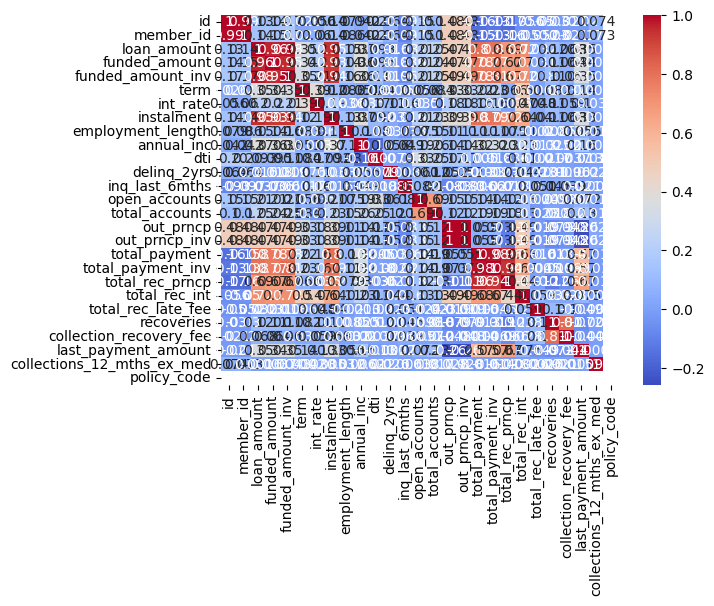

In [21]:
transformed_plotter_instance.plot_corr_matrix() # visualise correlated columns

## Correlated columns
Overly correlated columns are identified with a correlation heatmap but no correlated columns are dropped in order to enable querying and analysis of the full dataset

In [22]:
loan_payments_df_transformed.to_pickle('cleaned_data.pickle') # saves data in pickle format to preserve data types/data transformations 

## Data cleaning end
Data cleaning has been completed and the cleaned data saved to a pickle file for data preservation 

In [23]:
loan_payments_df = pd.read_pickle('cleaned_data.pickle') # load in cleaned and transformed data from pickle file
cleaned_data_plotter_instance = Plotter(loan_payments_df)   # initialise an instance of the plotter class with cleaned data
column_names = loan_payments_df.columns.tolist() # create list of column names for analysis

Percentage of the loans recovered against the investor funding and the total amount funded = 62.54 %


([0, 1], [Text(0, 0, 'total_funding'), Text(1, 0, 'investor_funding')])

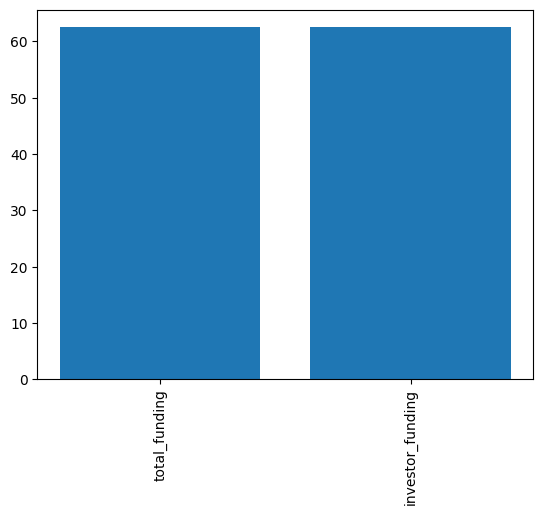

In [24]:
# Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded
out_prncp_zeros = (loan_payments_df.out_prncp == 0.00).sum()  
loans_recov_against_total_funding = (out_prncp_zeros/(len(loan_payments_df)))*100
print(f"Percentage of the loans recovered against the investor funding and the total amount funded = {loans_recov_against_total_funding.round(2)} %")
loans_recov_against_inv_funding = loans_recov_against_total_funding # out_prncp_inv is same % as columns have 1:1 correlation
funding = ['total_funding','investor_funding']
recovery_pc = [loans_recov_against_total_funding, loans_recov_against_inv_funding]
funding_df = pd.DataFrame({'Funding': funding, 'Recovery_percentage': recovery_pc}) # load data into df to enable plotting
fig1 = plt.figure(1)
plt.bar(funding_df['Funding'], funding_df['Recovery_percentage'], width=0.8) # plot bar chart of % recovery
plt.xticks(rotation=90)

<Axes: xlabel='Month', ylabel='Recovery_percentage'>

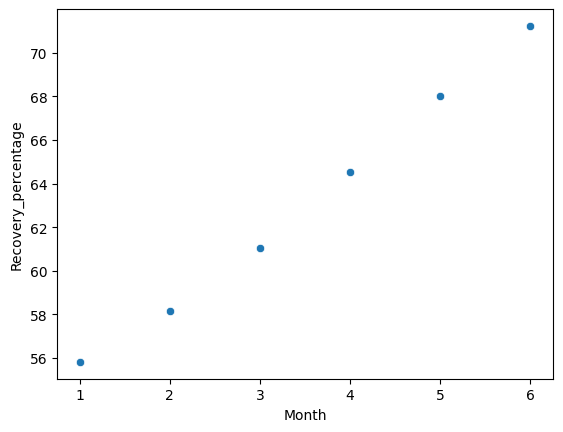

In [25]:
# visualise what percentage of the total amount would be recovered up to 6 months' in the future.
loan_payments_recovery_projection_df = loan_payments_df.copy()
loan_payments_recovery_projection_df['remaining_balance'] = loan_payments_recovery_projection_df['loan_amount'] -  loan_payments_recovery_projection_df['total_payment'] # calculate remaining balance of each loan
loan_payments_recovery_projection_df['month1'] = loan_payments_recovery_projection_df['remaining_balance'] - loan_payments_recovery_projection_df['instalment'] # minus monthly payment to get remaining balance for that month
loan_payments_recovery_projection_df['month2'] = loan_payments_recovery_projection_df['remaining_balance'] - (loan_payments_recovery_projection_df['instalment']*2) 
loan_payments_recovery_projection_df['month3'] = loan_payments_recovery_projection_df['remaining_balance'] - (loan_payments_recovery_projection_df['instalment']*3)
loan_payments_recovery_projection_df['month4'] = loan_payments_recovery_projection_df['remaining_balance'] - (loan_payments_recovery_projection_df['instalment']*4)
loan_payments_recovery_projection_df['month5'] = loan_payments_recovery_projection_df['remaining_balance'] - (loan_payments_recovery_projection_df['instalment']*5)
loan_payments_recovery_projection_df['month6'] = loan_payments_recovery_projection_df['remaining_balance'] - (loan_payments_recovery_projection_df['instalment']*6)

month1_pc = (((loan_payments_recovery_projection_df.month1 <= 0.00).sum())/(len(loan_payments_df)))*100 # calculate percentage of loans recovered after each month
month2_pc = (((loan_payments_recovery_projection_df.month2 <= 0.00).sum())/(len(loan_payments_df)))*100
month3_pc = (((loan_payments_recovery_projection_df.month3 <= 0.00).sum())/(len(loan_payments_df)))*100
month4_pc = (((loan_payments_recovery_projection_df.month4 <= 0.00).sum())/(len(loan_payments_df)))*100
month5_pc = (((loan_payments_recovery_projection_df.month5 <= 0.00).sum())/(len(loan_payments_df)))*100
month6_pc = (((loan_payments_recovery_projection_df.month6 <= 0.00).sum())/(len(loan_payments_df)))*100

month_no = [1,2,3,4,5,6]
loans_recovered_pc = [month1_pc, month2_pc, month3_pc, month4_pc, month5_pc, month6_pc]
recovery_df = pd.DataFrame({'Month': month_no,'Recovery_percentage': loans_recovered_pc}) # create df to plot data 
fig2 = plt.figure(2)
sns.scatterplot(data=recovery_df, x='Month', y='Recovery_percentage') # scatter plot of data to visualise projection

In [26]:
# Calculate the percentage of charged off loans historically 
charged_off_loans = (loan_payments_df.loan_status == 'Charged Off').sum()  
charged_off_loans_pc = (charged_off_loans/(len(loan_payments_df)))*100
print(f"Percentage of charged off loans historically = {charged_off_loans_pc.round(2)} %")

# and the total amount that was paid towards these loans before being charged off.
charged_off_loans_df = loan_payments_df.loc[loan_payments_df['loan_status']=='Charged Off']
total_loan_amount = charged_off_loans_df['loan_amount'].sum()
total_amount_paid = charged_off_loans_df['total_payment'].sum()
total_amount_paid_pc = (total_amount_paid/total_loan_amount)*100
print(f"total amount that was paid towards these loans before being charged off = £{total_amount_paid.round(2)}")

Percentage of charged off loans historically = 10.16 %
total amount that was paid towards these loans before being charged off = £37205334.75


In [27]:
# Calculate the loss in revenue these loans would have generated for the company if they had finished their term. 
time_passed = ((charged_off_loans_df['last_payment_date'] - charged_off_loans_df['issue_date'])) # calculate how much time has passed of the loan term
time_passed_days = time_passed.dt.days # convert to days 
charged_off_loans_df_calc = charged_off_loans_df.copy()
charged_off_loans_df_calc['time_passed_months'] = (time_passed_days/30.5).round() # convert to int value and divide by avg month length to get no of months
charged_off_loans_df_calc['time_remaining'] = charged_off_loans_df_calc['term'] - charged_off_loans_df_calc['time_passed_months'] # calculate number of months left of the term
charged_off_loans_df_calc['lost_revenue'] = charged_off_loans_df_calc['time_remaining']*charged_off_loans_df_calc['instalment'] # amount that would be paid over the remaining term
total_revenue_loss = charged_off_loans_df_calc['lost_revenue'].sum()
print(f"total loss in revenue these loans would have generated for the company  = £{total_revenue_loss.round(2)}")

total loss in revenue these loans would have generated for the company  = £67071135.36


In [28]:
# calculate the percentage of users behind with loan payments 
late_loans_1 = (loan_payments_df.loan_status == 'Late (16-30 days)').sum()   # count no of loans marked as late
late_loans_2 = (loan_payments_df.loan_status == 'Late (31-120 days)').sum()   # count no of loans marked as late
late_loans_pc = ((late_loans_1 + late_loans_2)/(len(loan_payments_df)))*100 # calculate total % of late loans 
print(f"total percentage of users behind with loan payments  = {late_loans_pc.round(2)} %")


total percentage of users behind with loan payments  = 1.27 %


In [29]:
# calculate how much loss the company would incur their status was changed to Charged Off
late_loans_df = loan_payments_df.apply(lambda row: row[loan_payments_df['loan_status'].isin(['Late (16-30 days)','Late (31-120 days)'])]) # filter df to obtain only rows with late status 
loss_incurred = late_loans_df['out_prncp'].sum() # sum the outstanding amount for each late loan to calculate loss 
print(f"total loss the company would incur if their status was changed to Charged Off  = £{loss_incurred.round(2)}")

total loss the company would incur if their status was changed to Charged Off  = £6024730.62


In [30]:
# What is the projected loss of these loans if the customer were to finish the full loans term?
time_passed_lateloans = ((late_loans_df['last_payment_date'] - late_loans_df['issue_date'])) # calculate how much time has passed of the loan term
time_passed_days_lateloans = time_passed_lateloans.dt.days # convert to days 
late_loans_df['time_passed_months'] = (time_passed_days_lateloans/30.5).round() # convert to int value and divide by avg month length to get no of months
late_loans_df['time_remaining'] = late_loans_df['term'] - late_loans_df['time_passed_months'] # calculate number of months left of the term
late_loans_df['outstanding_payments'] = late_loans_df['time_remaining']*late_loans_df['instalment'] # amount that would be paid over the remaining term
projected_loss = late_loans_df['outstanding_payments'].sum() 
print(f"total projected loss of these loans if the customers were to finish the full loans term  = £{projected_loss.round(2)}")

total projected loss of these loans if the customers were to finish the full loans term  = £7127087.01


In [31]:
# If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?
lost_revenue_df = loan_payments_df.apply(lambda row: row[loan_payments_df['loan_status'].isin(['Late (16-30 days)','Late (31-120 days)','Charged Off'])]) # filters customers who have already defaulted on loans as well as those with late payment status 
monthly_revenue_late_customers = lost_revenue_df['instalment'].sum()
total_monthly_revenue = loan_payments_df['instalment'].sum()
total_revenue_pc = (monthly_revenue_late_customers/total_monthly_revenue)*100
print(f"total percentage of total expected revenue from late and stopped payments  = {total_revenue_pc.round(2)} %")

total percentage of total expected revenue from late and stopped payments  = 11.68 %


In [32]:
# in order to visualise the possible indicators that a customer will not be able to pay the loan.
loan_payments_df_stopped_paying = loan_payments_df.loc[loan_payments_df['loan_status']=='Charged Off'] # subset containing only customers who have stopped paying
loan_payments_df_late_payments = loan_payments_df.apply(lambda row: row[loan_payments_df['loan_status'].isin(['Late (16-30 days)','Late (31-120 days)'])]) # subset containings customers with late payments

# initialise instances of plotter class for each df
original_df_plotter = Plotter(loan_payments_df)
stopped_paying_df_plotter = Plotter(loan_payments_df_stopped_paying)
late_payments_df_plotter = Plotter(loan_payments_df_late_payments)

# intiailise instances of dataframeinfo class for each df
original_df_info = DataFrameInfo(loan_payments_df)
stopped_paying_df_info = DataFrameInfo(loan_payments_df_stopped_paying)
late_payments_df_info = DataFrameInfo(loan_payments_df_late_payments)

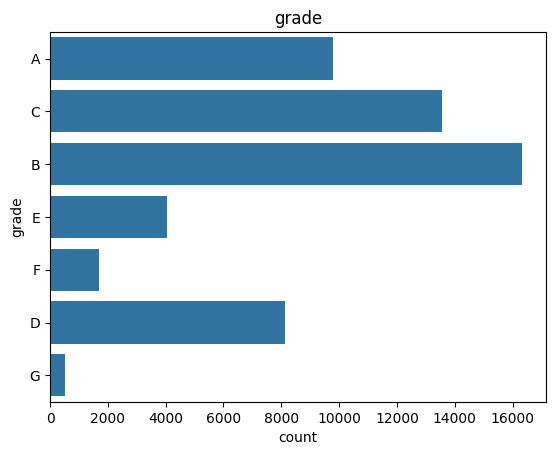

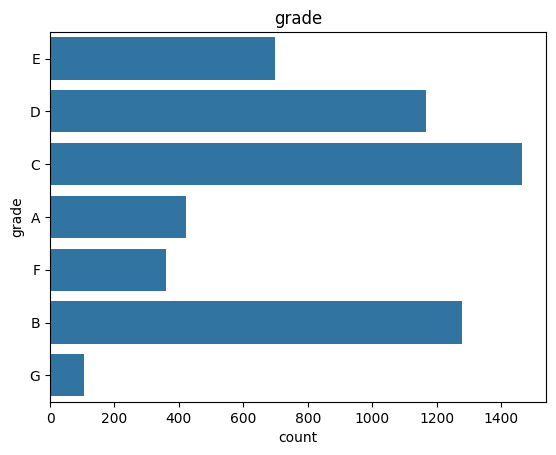

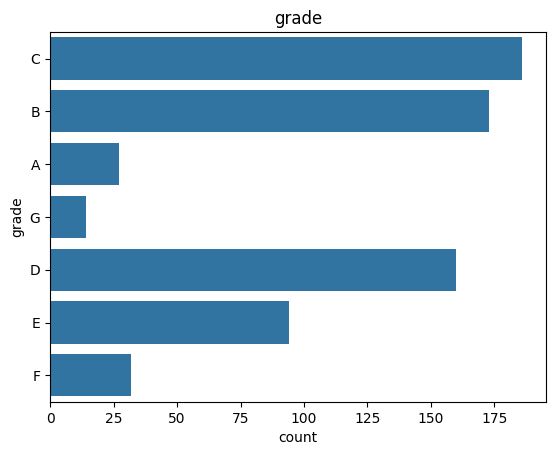

In [33]:
#grade of the loan as an indicator - NOT STRONG INDICATOR
fig3 = plt.figure(3)
original_df_plotter.plot_countplot('grade') # visualise distribution for all data
fig4 = plt.figure(4)
stopped_paying_df_plotter.plot_countplot('grade')  # visualise distribution for customers who are not paying
fig5 = plt.figure(5)
late_payments_df_plotter.plot_countplot('grade') # visualise distribution for customers who are late paying


In [ ]:
# purpose of loan as indicator - NOT STRONG INDICATOR
fig6 = plt.figure(6)
original_df_plotter.plot_countplot('purpose') # visualise distribution for all data
fig7 = plt.figure(7)
stopped_paying_df_plotter.plot_countplot('purpose')  # visualise distribution for customers who are not paying
fig8 = plt.figure(8)
late_payments_df_plotter.plot_countplot('purpose') # visualise distribution for customers who are late paying


In [ ]:
# home owenership as indicator - NOT STRONG INDICATOR
fig9 = plt.figure(9)
original_df_plotter.plot_countplot('home_ownership') # visualise distribution for all data
fig10 = plt.figure(10)
stopped_paying_df_plotter.plot_countplot('home_ownership')  # visualise distribution for customers who are not paying
fig11 = plt.figure(11)
late_payments_df_plotter.plot_countplot('home_ownership') # visualise distribution for customers who are late paying


2759.606854919214 0.0 8782.406151603498


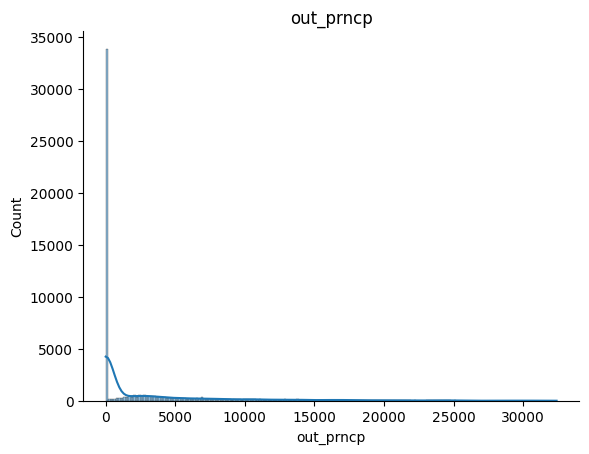

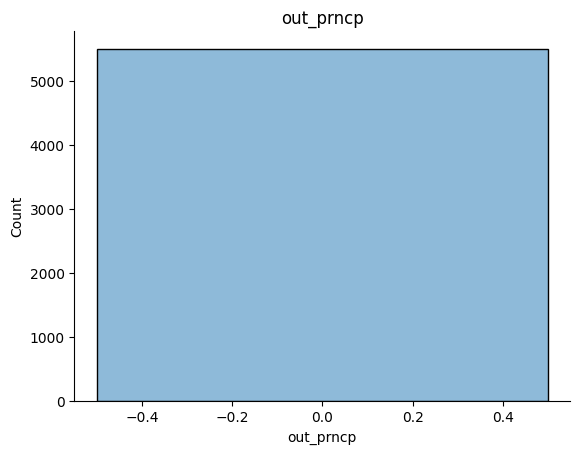

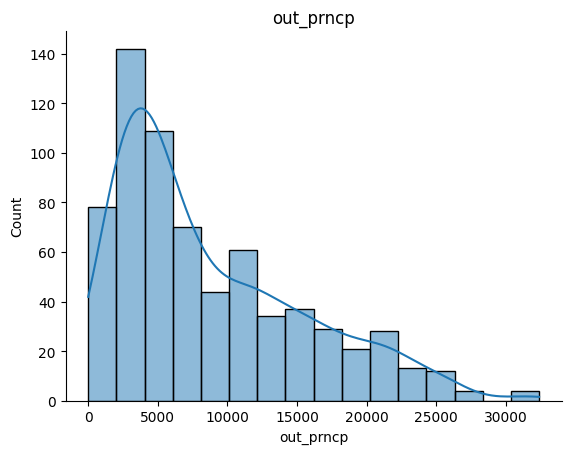

In [34]:
#out_prncp as indicator - POSSIBLE INDICATOR
fig12 = plt.figure(12)
original_df_plotter.plot_KDE('out_prncp') # visualise distribution for all data
fig13 = plt.figure(13)
stopped_paying_df_plotter.plot_KDE('out_prncp')  # visualise distribution for customers who are not paying
fig14 = plt.figure(14)
late_payments_df_plotter.plot_KDE('out_prncp') # visualise distribution for customers who are late paying

original_mean_out_prncp = original_df_info.get_mean('out_prncp') # caluclate mean for all data
stopped_paying_mean_out_prncp = stopped_paying_df_info.get_mean('out_prncp') # calcualte mean for customers who are not paying
late_payment_mean_out_prncp = late_payments_df_info.get_mean('out_prncp') # calcualte mean for customers who are late paying
print(original_mean_out_prncp, stopped_paying_mean_out_prncp, late_payment_mean_out_prncp) 
# higher average out_prncp for those with late payments, suggests this is an indicator for late payments 

0.886320878221912 3.2072043524118974 4.7571120219887755


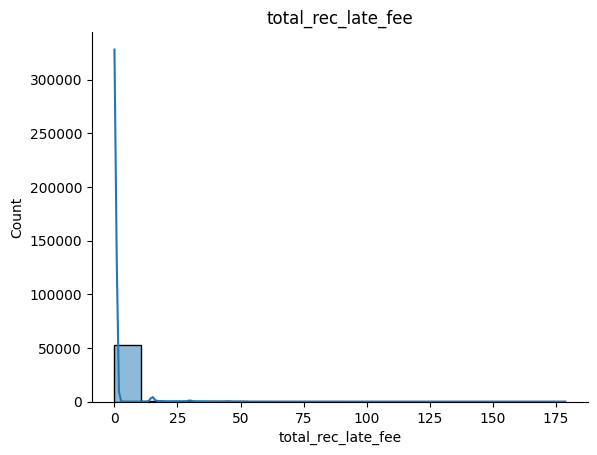

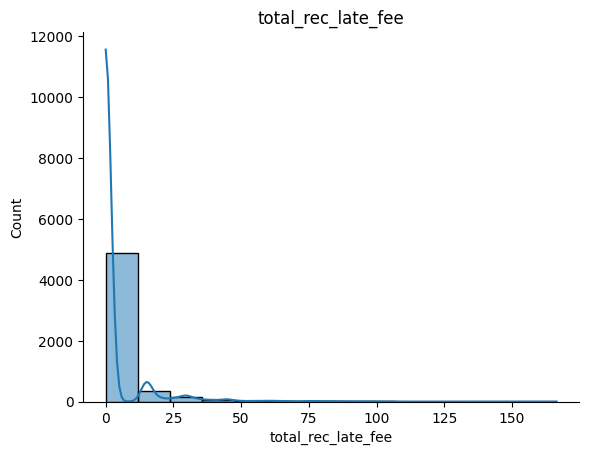

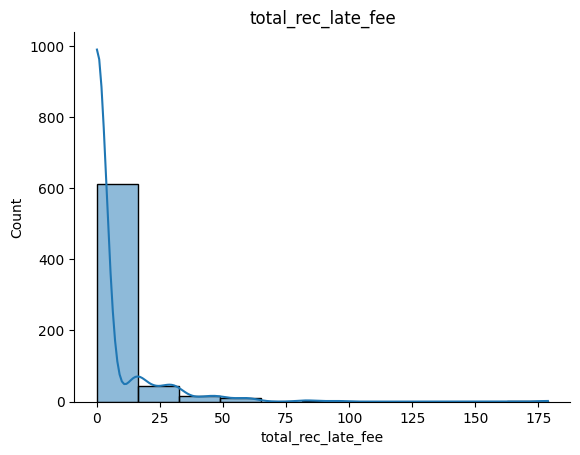

In [35]:
# total_rec_late_fee as indicator - POSSIBLE INDICATOR
fig15 = plt.figure(15)
original_df_plotter.plot_KDE('total_rec_late_fee') # visualise distribution for all data
fig16 = plt.figure(16)
stopped_paying_df_plotter.plot_KDE('total_rec_late_fee')  # visualise distribution for customers who are not paying
fig17 = plt.figure(17)
late_payments_df_plotter.plot_KDE('total_rec_late_fee') # visualise distribution for customers who are late paying
original_mean_total_rec_late_fee = original_df_info.get_mean('total_rec_late_fee') # caluclate mean for all data
stopped_paying_mean_total_rec_late_fee = stopped_paying_df_info.get_mean('total_rec_late_fee') # calcualte mean for customers who are not paying
late_payment_mean_total_rec_late_fee = late_payments_df_info.get_mean('total_rec_late_fee') # calcualte mean for customers who are late paying
print(original_mean_total_rec_late_fee, stopped_paying_mean_total_rec_late_fee, late_payment_mean_total_rec_late_fee) 
# higher average total late fees for those with late payments or charged off payments, suggests this is an indicator 

2582.251505157689 2279.1630252865198 3808.5891545189506


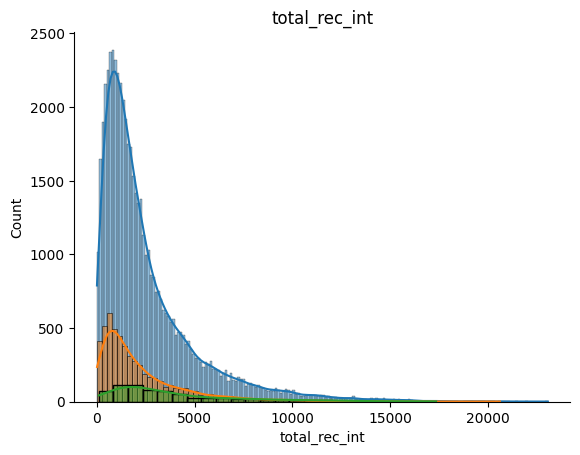

In [36]:
# total_rec_int as indicator - POSSIBLE INDICATOR
fig18 = plt.figure(18) 
original_df_plotter.plot_KDE('total_rec_int') # visualise distribution for all data
fig18 = plt.figure(18)
stopped_paying_df_plotter.plot_KDE('total_rec_int') # visualise distribution for customers who are not paying
fig18 = plt.figure(18)
late_payments_df_plotter.plot_KDE('total_rec_int') # visualise distribution for customers who are late paying
original_mean_total_rec_int = original_df_info.get_mean('total_rec_int') # caluclate mean for all data
stopped_paying_mean_total_rec_int = stopped_paying_df_info.get_mean('total_rec_int') # calcualte mean for customers who are not paying
late_payment_mean_total_rec_int= late_payments_df_info.get_mean('total_rec_int') # calcualte mean for customers who are late paying
print(original_mean_total_rec_int, stopped_paying_mean_total_rec_int, late_payment_mean_total_rec_int) 
# higher averages for late payments suggests total_rec_int is an indicator 

3137.594499759677 409.1434637074768 469.81271137026243


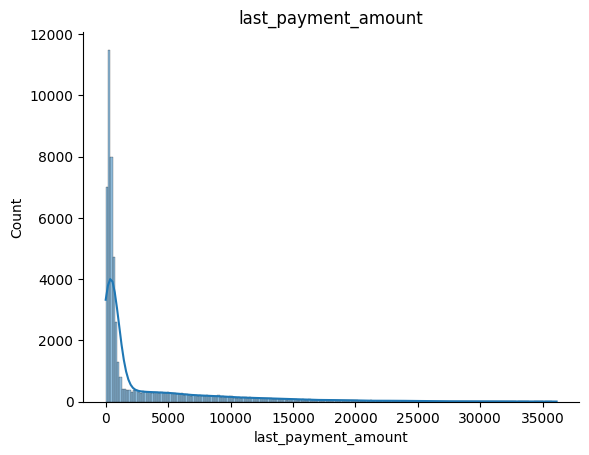

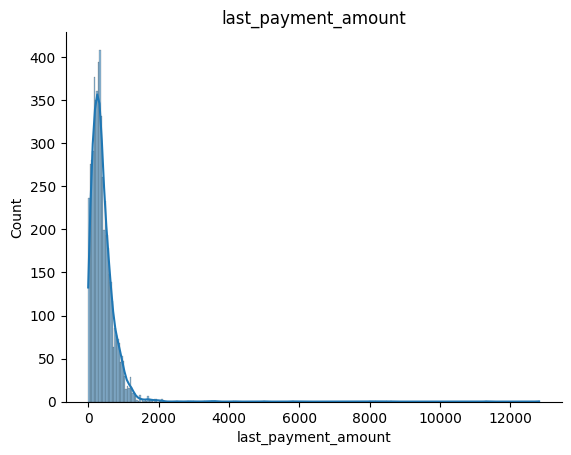

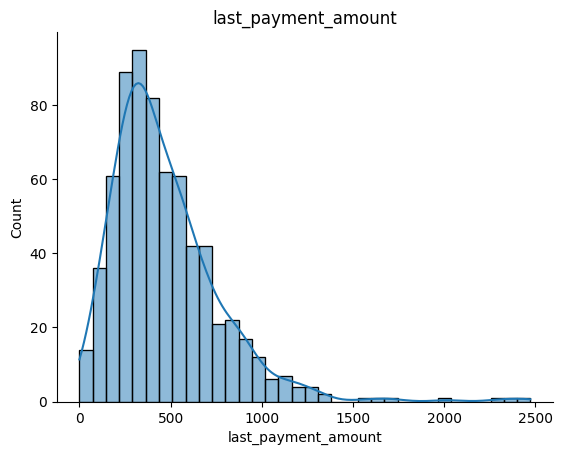

In [37]:
#last_payment_amount as indicator - POSSIBLE INDICATOR
fig19 = plt.figure(19)
original_df_plotter.plot_KDE('last_payment_amount') # visualise distribution for all data
fig20 = plt.figure(20)
stopped_paying_df_plotter.plot_KDE('last_payment_amount') # visualise distribution for customers who are not paying
fig21 = plt.figure(21)
late_payments_df_plotter.plot_KDE('last_payment_amount') # visualise distribution for customers who are late paying
original_mean_last_payment_amount = original_df_info.get_mean('last_payment_amount') # caluclate mean for all data
stopped_paying_mean_last_payment_amount = stopped_paying_df_info.get_mean('last_payment_amount') # calcualte mean for customers who are not paying
late_payment_mean_last_payment_amount= late_payments_df_info.get_mean('last_payment_amount') # calcualte mean for customers who are late paying
print(original_mean_last_payment_amount, stopped_paying_mean_last_payment_amount, late_payment_mean_last_payment_amount)
# Last payments amount is lower for late payments and charged off payments, suggests lower last payment amount is an indicator of not paying back/paying late


In [ ]:
plt.show()
